In [ ]:
import tensorflow as tf

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000] #cortando o train set até os 5000 últimos elementos
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [ ]:
X_train.shape #55000 imagens de 28x28 pixels

(55000, 28, 28)

In [ ]:
X_train.dtype #cada pixel é representado por um byte (8 bits)

dtype('uint8')

In [ ]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255. #ajustando a escala para 0-1 e convertendo para floats

In [ ]:
import matplotlib.pyplot as plt
#para ver as imagens

#plt.imshow(X_train[0], cmap="binary")
#plt.axis('off')
#plt.show()

In [ ]:
y_train

array([9, 0, 0, ..., 9, 0, 2], dtype=uint8)

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]

'Ankle boot'

Criando um modelo usando Sequential API

In [ ]:
tf.random.set_seed(42)
tf.keras.backend.clear_session()
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=[28,28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300,activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax')) #output with 10 neurons (as the problem asks)


Pode ser feito assim também
```
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
```



#analisando as layers

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


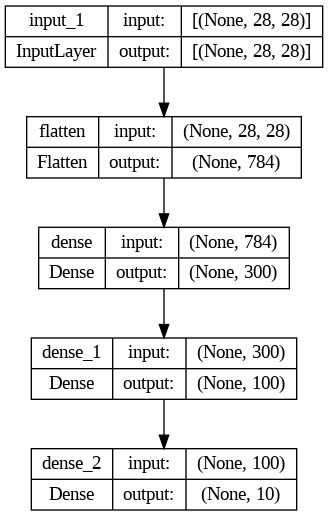

In [ ]:
tf.keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [ ]:
model.layers

In [ ]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [ ]:
model.get_layer('dense') is hidden1

True

In [ ]:
weights, biases = hidden1.get_weights()
weights #connections weights initialized randomly

array([[-0.01159689, -0.04074935,  0.06924799, ..., -0.00021715,
         0.02628507, -0.0399463 ],
       [-0.06061353,  0.01789333,  0.06524938, ..., -0.04382511,
         0.05171758, -0.03412614],
       [-0.03935054, -0.03807375,  0.01598542, ...,  0.05715244,
        -0.02143412,  0.05963066],
       ...,
       [-0.03287791,  0.02113865, -0.05546208, ...,  0.03728672,
        -0.02132376, -0.03397262],
       [-0.02840919,  0.03633759,  0.0378689 , ...,  0.01252285,
         0.03326878, -0.04216219],
       [-0.03132578, -0.02775018,  0.0514257 , ...,  0.04943255,
         0.05995664, -0.0625446 ]], dtype=float32)

In [ ]:
weights.shape

(784, 300)

In [ ]:
biases #initialized with 0s

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
biases.shape

(300,)

# compiling the model

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

treinando e avaliando o modelo

In [ ]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 10s 5ms/step - loss: 0.7078 - accuracy: 0.7683 - val_loss: 0.4979 - val_accuracy: 0.8272
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4833 - accuracy: 0.8316 - val_loss: 0.4611 - val_accuracy: 0.8342
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4387 - accuracy: 0.8459 - val_loss: 0.4252 - val_accuracy: 0.8524
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4139 - accuracy: 0.8549 - val_loss: 0.3958 - val_accuracy: 0.8590
Epoch 5/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3933 - accuracy: 0.8634 - val_loss: 0.3860 - val_accuracy: 0.8606
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3766 - accuracy: 0.8666 - val_loss: 0.3964 - val_accuracy: 0.8576
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3644 - accuracy: 0.8705 - val_loss: 0.3730 - val_accurac

In [ ]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [ ]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


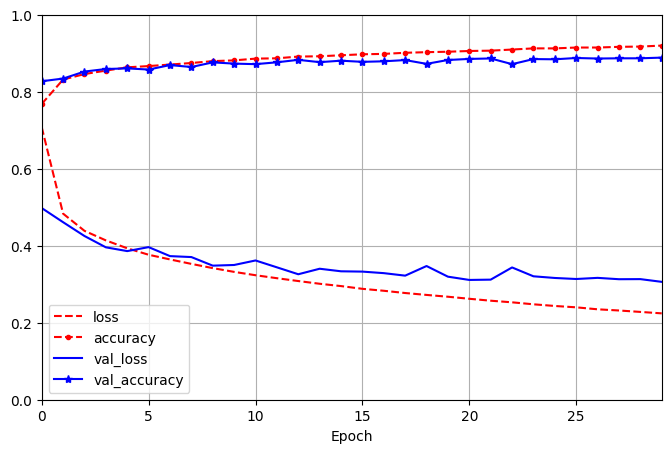

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
                                   style=["r--", "r--.", "b-", "b-*"])

plt.show()

evauating on the test set

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3261 - accuracy: 0.8849


[0.326060950756073, 0.8848999738693237]

# Making predictions (classification with sequential API example)

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 75ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.98],
       [0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
y_pred = y_proba.argmax(axis=-1)
y_pred
#mostra só os mais prováveis

array([9, 2, 1])

In [ ]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

#Regression MLP using Sequential API (pulei- a importação de dados não funcionou)

# Modelos complexos usando Functional API (nenhum funcionou)

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [ ]:
normalization_layer = tf.keras.layers.Normalization() #scales up the features
hidden_layer1 = tf.keras.layers.Dense(30,activation = 'relu')
hidden_layer2 = tf.keras.layers.Dense(30, activation = 'relu')
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape = X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized,hidden2]) # une os caminhos wide and deep
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])


obs: shape = `X_train.shape[1:]` : O parâmetro shape especifica a forma (dimensão) dos dados de entrada esperados.

  `X_train.shape` retorna as dimensões do conjunto de dados de treinamento X_train.
  `X_train.shape[1:]` pega todas as dimensões exceto a primeira. A primeira dimensão geralmente é o número de exemplos no conjunto de dados, então` X_train.shape[1:]` representa a forma dos dados de um único exemplo, sem considerar o número de exemplos.

In [ ]:
#Depois de escrever o modelo, os demais passos são identicos aos do Sequential API
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 28, 28)]             0         []                            
                                                                                                  
 normalization (Normalizati  (None, 28, 28)               57        ['input_1[0][0]']             
 on)                                                                                              
                                                                                                  
 dense (Dense)               (None, 28, 30)               870       ['normalization[0][0]']       
                                                                                                  
 dense_1 (Dense)             (None, 28, 30)               930       ['dense[0][0]']           

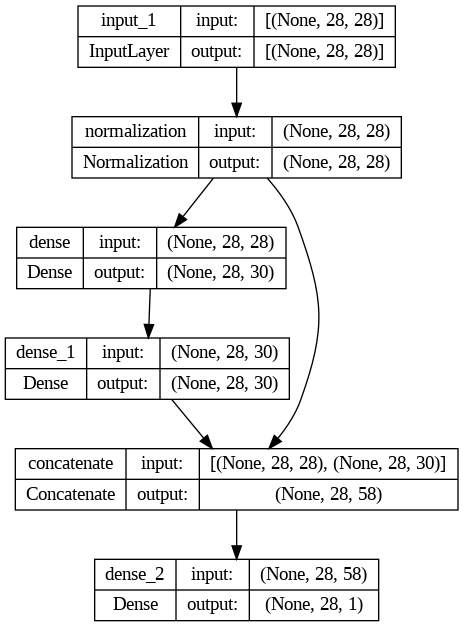

In [ ]:
tf.keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='mse',optimizer=optimizer, metrics=['RootMeanSquaredError'])
normalization_layer.adapt(X_train)
history2 = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))


Epoch 1/20
1719/1719 [==============================] - 9s 5ms/step - loss: 8.8919 - root_mean_squared_error: 2.9820 - val_loss: 8.4944 - val_root_mean_squared_error: 2.9147
Epoch 2/20
1719/1719 [==============================] - 7s 4ms/step - loss: 8.3269 - root_mean_squared_error: 2.8856 - val_loss: 8.4195 - val_root_mean_squared_error: 2.9018
Epoch 3/20
1719/1719 [==============================] - 8s 4ms/step - loss: 8.2904 - root_mean_squared_error: 2.8793 - val_loss: 8.4989 - val_root_mean_squared_error: 2.9154
Epoch 4/20
1719/1719 [==============================] - 8s 4ms/step - loss: 8.2758 - root_mean_squared_error: 2.8768 - val_loss: 8.3916 - val_root_mean_squared_error: 2.8970
Epoch 5/20
1719/1719 [==============================] - 7s 4ms/step - loss: 8.2657 - root_mean_squared_error: 2.8750 - val_loss: 8.3924 - val_root_mean_squared_error: 2.8972
Epoch 6/20
1719/1719 [==============================] - 8s 5ms/step - loss: 8.2595 - root_mean_squared_error: 2.8740 - val_loss: 8

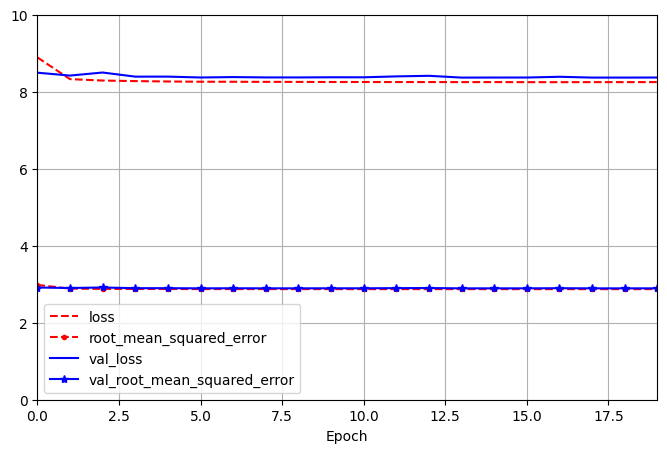

In [ ]:
pd.DataFrame(history2.history).plot(figsize=(8, 5), xlim=[0, 19], ylim=[0, 10], grid=True, xlabel="Epoch",
                                   style=["r--", "r--.", "b-", "b-*"])

plt.show()

In [ ]:
input_wide = tf.keras.layers.Input(shape=[5])  # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6])  # features 2 to 7

hidden1 = tf.keras.layers.Dense(30, activation="relu")(input_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)

concat = tf.keras.layers.concatenate([input_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

In [ ]:
model.compile(loss="mse", optimizer='sgd')

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

history3 = model.fit((X_train_wide, X_train_deep), y_train, epochs=20,
                    validation_data=((X_valid_wide, X_valid_deep), y_valid))
mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = model.predict((X_new_wide, X_new_deep))

Epoch 1/20


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 1 of layer "model_4" is incompatible with the layer: expected shape=(None, 6), found shape=(None, 26, 28)
